# AUC over time

In [1]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sys
import os

# warnings.simplefilter('ignore', pd.errors.DtypeWarning)
sys.path.append('/sise/home/shakarch/muscle-formation-regeneration')
sys.path.append(os.path.abspath('..'))
# np.seterr(divide='ignore')
# warnings.simplefilter("ignore")

from TimeSeriesAnalysis.utils.data_load_save import *
from TimeSeriesAnalysis.auc_over_time_diff_prob import *
import TimeSeriesAnalysis.params as params
import TimeSeriesAnalysis.consts as consts

/home/shakarch/.conda/envs/tf-env-new/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/shakarch/.conda/envs/tf-env-new/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/shakarch/.conda/envs/tf-env-new/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [2]:
def load_tsfresh_transformed_df(modality, vid_num):
    tsfresh_transform_path = consts.storage_path + f"data/mastodon/ts_transformed/{modality}/{params.impute_methodology}_{params.impute_func}/S{vid_num}/" \
                         f"merged_chunks_reg={params.registration_method},local_den=False,win size={params.window_size}.pkl"
    df_s = pickle.load(open(tsfresh_transform_path, 'rb'))

    return df_s

In [3]:
def get_auc_over_time(con_vid_n, diff_vid_n, train_vid_nums, modality):
    df_con = load_tsfresh_transformed_df(modality, con_vid_n)
    df_diff = load_tsfresh_transformed_df(modality, diff_vid_n)
    
    data_path = consts.intensity_model_path if modality == "actin_intensity" else consts.motility_model_path
    data_path = data_path % (train_vid_nums[0], train_vid_nums[1])

    clf, _, _, _, _ = load_data(data_path, load_clf=True, load_x_train=False, load_x_test=False, load_y_train=False, load_y_test=False)
    cols = list(clf.feature_names_in_) + ["Spot track ID", "Spot frame"]
    
    aucs = auc_over_time(df_con[cols], df_diff[cols], clf)
    plot_auc_over_time([(aucs, modality)], path=consts.storage_path + f"eps_figs/auc_over_time s{con_vid_n}, s{diff_vid_n} {modality}.eps")
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


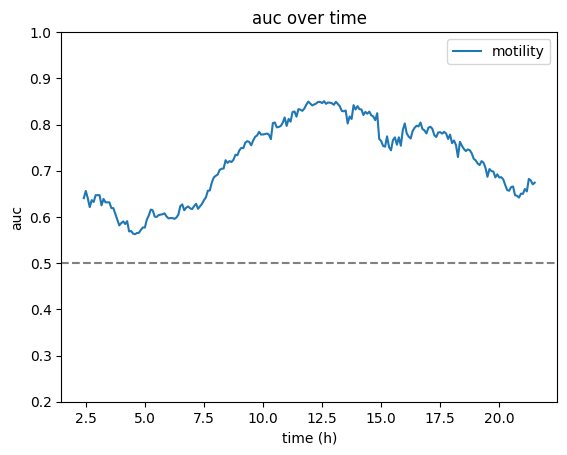

<Figure size 640x480 with 0 Axes>

In [4]:
get_auc_over_time(2, 3, (1,5), "motility")

In [ ]:
get_auc_over_time(2, 3, (1,5), "actin_intensity")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


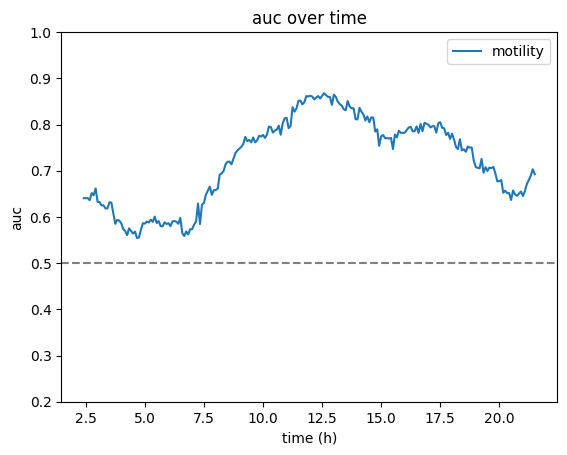

<Figure size 640x480 with 0 Axes>

In [6]:
get_auc_over_time(2, 3, (1,5), "motility")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


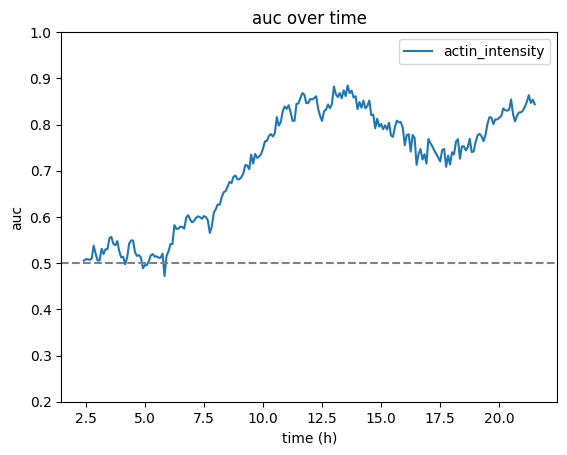

<Figure size 640x480 with 0 Axes>

In [7]:
get_auc_over_time(2, 3, (1,5), "actin_intensity")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


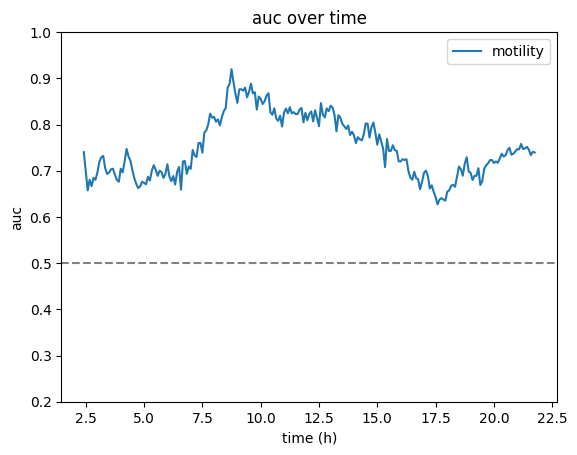

<Figure size 640x480 with 0 Axes>

In [8]:
get_auc_over_time(1, 5, (2,3), "motility")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


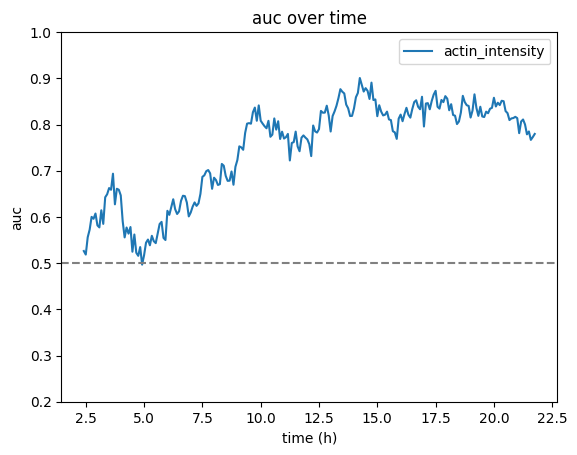

<Figure size 640x480 with 0 Axes>

In [9]:
get_auc_over_time(1, 5, (2,3), "actin_intensity")